## 라이브러리 임포트

In [5]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable
from typing import Dict

# matplotlib 폰트설정
#plt.rc('font', family='NanumGothicOTF') # For MacOS
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


In [6]:
np.set_printoptions(precision=4)

# 파이썬 리스트 vs. 넘파이 배열

In [7]:
print("파이썬 리스트를 사용한 연산:")
a = [1,2,3]
b = [4,5,6]
print("a+b:", a + b)
try:
    print(a * b)
except TypeError:
    print("a*b 파이썬 리스트에 a*b와 같은 연산을 할 수 없음")
print()
print("넘파이 배열을 사용한 연산:")
a = np.array([1,2,3])
b = np.array([4,5,6])
print("a+b:", a + b)
print("a*b:", a * b)

파이썬 리스트를 사용한 연산:
a+b: [1, 2, 3, 4, 5, 6]
a*b 파이썬 리스트에 a*b와 같은 연산을 할 수 없음

넘파이 배열을 사용한 연산:
a+b: [5 7 9]
a*b: [ 4 10 18]


In [8]:
a = np.array([[1,2,3],
              [4,5,6]]) 
print(a)

[[1 2 3]
 [4 5 6]]


In [9]:
b = np.array([10,20,30])
print("a + b:\n", a + b)

a + b:
 [[11 22 33]
 [14 25 36]]


In [10]:
a = np.array([[1, 2],
              [3, 4]])
print('a:')
print(a)
print('a.sum(axis=0):', a.sum(axis=0))
print('a.sum(axis=1):', a.sum(axis=1))

a:
[[1 2]
 [3 4]]
a.sum(axis=0): [4 6]
a.sum(axis=1): [3 7]


# 함수의 기초

In [11]:
def square(x: ndarray) -> ndarray:
    '''
    인자로 받은 ndarray 배열의 각 요솟값을 제곱한다.
    '''
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    '''
    ndarry 배열의 각 요소에 'Leaky ReLU' 함수를 적용한다.
    '''
    return np.maximum(0.2 * x, x)

In [12]:
# IMG_FOLDER_PATH = '/Users/seth/development/01_deep-learning-from-scratch/images/01_foundations/'
# PDF_IMG_FOLDER_PATH = '/Users/seth/development/01_deep-learning-from-scratch/pdf_images/01_foundations/'

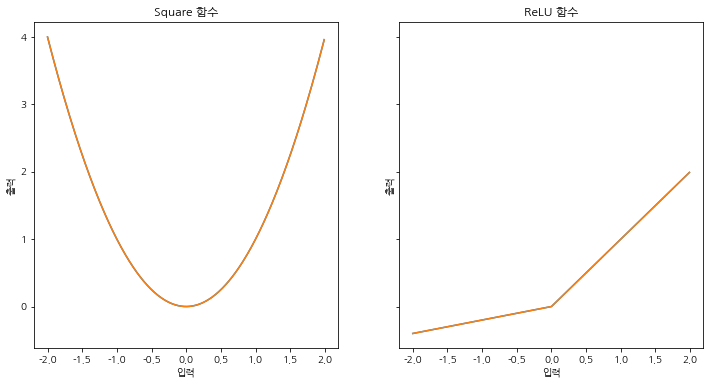

In [13]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))  # 2 Rows, 1 Col

input_range = np.arange(-2, 2, 0.01)
ax[0].plot(input_range, square(input_range))
ax[0].plot(input_range, square(input_range))
ax[0].set_title('Square 함수')
ax[0].set_xlabel('입력')
ax[0].set_ylabel('출력')

ax[1].plot(input_range, leaky_relu(input_range))
ax[1].plot(input_range, leaky_relu(input_range))
ax[1].set_title('ReLU 함수')
ax[1].set_xlabel('입력')
ax[1].set_ylabel('출력');
# plt.savefig(IMG_FOLDER_PATH + "01_two_functions.png")
# plt.savefig(PDF_IMG_FOLDER_PATH + "01_two_functions.pdf")

In [14]:
from typing import Callable

def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          diff: float = 0.001) -> ndarray:
    '''
    배열 input의 각 요소에 대해 함수 func의 도함숫값 계산
    '''
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)

# `합성함수`

In [15]:
from typing import List

# ndarray를 인자로 받고 ndarray를 반환하는 함수
Array_Function = Callable[[ndarray], ndarray]

# Chain은 함수의 리스트다.
Chain = List[Array_Function]

In [16]:
def chain_length_2(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    두 함수를 연쇄(chain)적으로 평가
    '''
    assert len(chain) == 2, \
    "인자 chain의 길이는 2여야 함"

    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(x))

## 합성함수의 도함수

In [17]:
def square(x: ndarray) -> ndarray:
    '''
    인자로 받은 ndarray 배열의 각 요솟값을 제곱한다.
    '''
    return np.power(x, 2)

def sigmoid(x: ndarray) -> ndarray:
    '''
    입력으로 받은 ndarray의 각 요소에 대한 sigmoid 함숫값을 계산한다.
    '''
    return 1 / (1 + np.exp(-x))

In [18]:
def chain_deriv_2(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    두 함수로 구성된 합성함수의 도함수를 계산하기 위해 연쇄법칙을 사용함
    (f2(f1(x))' = f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 2, \
    "인자 chain의 길이는 2여야 함"

    assert input_range.ndim == 1, \
    "input_range는 1차원 ndarray여야 함"

    f1 = chain[0]
    f2 = chain[1]

    # df1/dx
    f1_of_x = f1(input_range)

    # df1/du
    df1dx = deriv(f1, input_range)

    # df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))

    # 각 점끼리 값을 곱함
    return df1dx * df2du

In [19]:
def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray) -> None:
    '''
    2개 이상의 ndarray -> ndarray 매핑으로 구성된 합성함수의
    그래프를 input_range 구간에 대해 작도함.
    
    ax: 작도에 사용할 matplotlib의 서브플롯
    '''
    
    assert input_range.ndim == 1, \
    "input_range는 1차원 ndarray여야 함"

    output_range = chain_length_2(chain, input_range)
    ax.plot(input_range, output_range)

In [20]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray) -> ndarray:
    '''
    연쇄법칙을 이용해 합성함수의 도함수를 계산하고 그래프를 작도함.
    
    ax: 작도에 사용할 matplotlib의 서브플롯
    '''
    output_range = chain_deriv_2(chain, input_range)
    ax.plot(input_range, output_range)

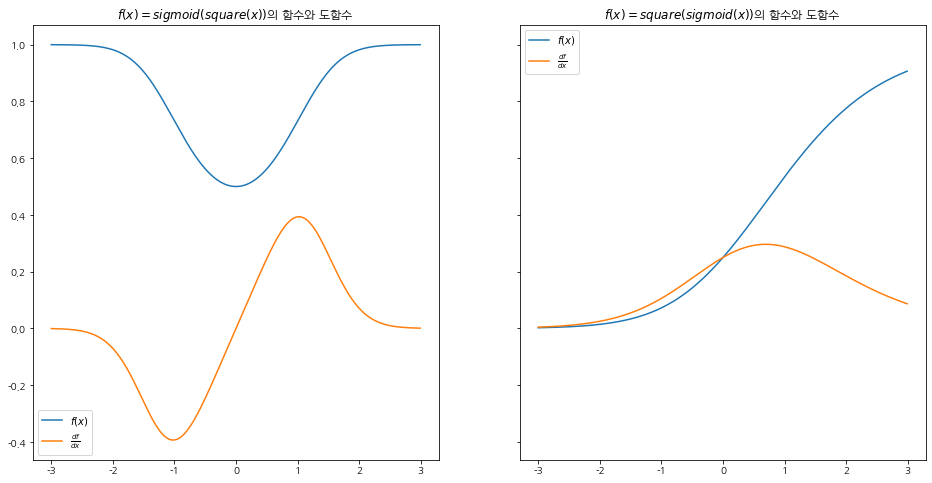

In [25]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("$f(x) = sigmoid(square(x))$의 함수와 도함수")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("$f(x) = square(sigmoid(x))$의 함수와 도함수");

# plt.savefig(IMG_FOLDER_PATH + "08_plot_chain_rule_1.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "08_plot_chain_rule_1.pdf");

# `조금 더 복잡한 예제`

In [22]:
def chain_length_3(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    3개의 함수를 연쇄적으로 평가함.
    '''
    assert len(chain) == 3, \
    "인자 chain의 길이는 3이여야 함"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    return f3(f2(f1(x)))

In [23]:
def chain_deriv_3(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    세 함수로 구성된 함성함수의 도함수를 계산하기 위해 연쇄법칙을 사용함
    (f3(f2(f1)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 3, \
    "This function requires 'Chain' objects to have length 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    # f1(x)
    f1_of_x = f1(input_range)

    # f2(f1(x))
    f2_of_x = f2(f1_of_x)

    # df3du
    df3du = deriv(f3, f2_of_x)

    # df2du
    df2du = deriv(f2, f1_of_x)

    # df1dx
    df1dx = deriv(f1, input_range)

    # 각 점끼리 값을 곱함
    return df1dx * df2du * df3du

In [24]:
def square(x: ndarray) -> ndarray:
    '''
    인자로 받은 ndarray 배열의 각 요솟값을 제곱한다.
    '''
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    '''
    ndarry 배열의 각 요소에 'Leaky ReLU' 함수를 적용한다.
    '''
    return np.maximum(0.2 * x, x)

def sigmoid(x: ndarray) -> ndarray:
    '''
    입력으로 받은 ndarray의 각 요소에 대한 sigmoid 함숫값을 계산한다.
    '''
    return 1 / (1 + np.exp(-x))

In [27]:
def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray,
               length: int=2) -> None:
    '''
    연쇄법칙을 이용해 합성함수의 도함수를 계산하고 그래프를 작도함.
    
    ax: 작도에 사용할 matplotlib의 서브플롯
    '''
    
    assert input_range.ndim == 1, \
    "input_range는 1차원 ndarray여야 함"
    if length == 2:
        output_range = chain_length_2(chain, input_range)
    elif length == 3:
        output_range = chain_length_3(chain, input_range)
    ax.plot(input_range, output_range)

In [28]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray,
                     length: int=2) -> ndarray:
    '''
    연쇄법칙을 이용해 합성함수의 도함수를 계산하고 그래프를 작도함.
    
    ax: 작도에 사용할 matplotlib의 서브플롯
    '''

    if length == 2:
        output_range = chain_deriv_2(chain, input_range)
    elif length == 3:
        output_range = chain_deriv_3(chain, input_range)
    ax.plot(input_range, output_range)

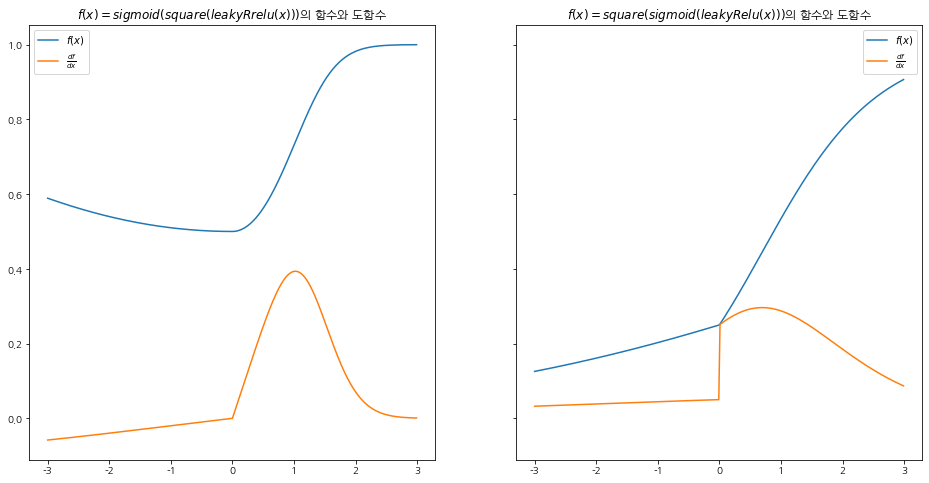

In [29]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [leaky_relu, square, sigmoid]
chain_2 = [leaky_relu, sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE, length=3)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE, length=3)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("$f(x) = sigmoid(square(leakyRrelu(x)))$의 함수와 도함수")

plot_chain(ax[1], chain_2, PLOT_RANGE, length=3)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE, length=3)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("$f(x) = square(sigmoid(leakyRelu(x)))$의 함수와 도함수");

# plt.savefig(IMG_FOLDER_PATH + "09_plot_chain_rule_2.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "09_plot_chain_rule_2.pdf");

# 입력이 두개 이상인 함수의 합성함수

In [30]:
def multiple_inputs_add(x: ndarray,
                        y: ndarray,
                        sigma: Array_Function) -> float:
    '''
    두 개의 입력을 받아 값을 더하는 함수의 순방향 계산
    '''
    assert x.shape == y.shape

    a = x + y
    return sigma(a)

In [31]:
def multiple_inputs_add_backward(x: ndarray,
                                 y: ndarray,
                                 sigma: Array_Function) -> float:
    '''
    두 개의 입력을 받는 함수의 두 입력에 대한 각각의 도함수 계산
    '''
    # 정방향 계산 수행
    a = x + y

    # 도함수 계산
    dsda = deriv(sigma, a)

    dadx, dady = 1, 1

    return dsda * dadx, dsda * dady

# 행렬곱을 포함하는 함수

In [32]:
def matmul_forward(X: ndarray,
                   W: ndarray) -> ndarray:
    '''
    순방향 계산을 행렬곱으로 계산
    '''
    
    assert X.shape[1] == W.shape[0], \
    '''
    행렬곱을 계산하려면 첫 번째 배열의 열의 개수와
    두 번째 배열의 행의 개수가 일치해야 한다.
    그러나 지금은 첫 번째 배열의 열의 개수가 {0}이고
    두 번째 배열의 행의 개수가 {1}이다.
    '''.format(X.shape[1], W.shape[0])

    # 행렬곱 연산
    N = np.dot(X, W)

    return N

In [37]:
def matmul_backward_first(X: ndarray,
                          W: ndarray) -> ndarray:
    '''
    첫 번째 인자에 대한 행렬곱의 역방향 계산 수행
    '''

    # 역방향 계산
    dNdX = np.transpose(W, (1, 0))

    return dNdX

In [38]:
np.random.seed(190203)

X = np.random.randn(1,3)
W = np.random.randn(3,1)

print(X)
matmul_backward_first(X, W)

[[ 0.4723  0.6151 -1.7262]]


array([[ 0.9282, -0.6075, -1.2214]])

In [39]:
def matrix_forward_extra(X: ndarray,
                         W: ndarray,
                         sigma: Array_Function) -> ndarray:
    '''
    행렬곱이 포함된 함수와 또 다른 함수의 합성함수에 대한 순방향 계산을 수행
    '''
    assert X.shape[1] == W.shape[0]

    # 행렬곱
    N = np.dot(X, W)

    # 행렬곱의 출력을 함수 sigma의 입력값으로 전달
    S = sigma(N)

    return S

# 행렬곱을 포함하는 함수의 도함수

다음 조건을 만족하면:

* $X$ 의 모양이 $m \times n$
* $W$ 의 모양이 $n \times p$

$X * W$의 모양은 $m \times p$가 된다.

$N$의 각 요솟값에 대한 손실의 편미분의 모양이 $m \times p$이면,
다음이 성립한다.

* $\frac{\partial N}{\partial X} = N * W^T$ (`np.dot((m,p), (p,n)) = m x n`
* $\frac{\partial N}{\partial W} = X^T * N$ (`np.dot((n,m), (m,p)) = n x p`

단, 역방향 계산에서 행렬곱의 순서가 위와 같아야 한다.

In [40]:
def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function) -> ndarray:
    '''
    첫 번째 요소에 대한 행렬함수의 도함수 계산
    '''
    assert X.shape[1] == W.shape[0]

    # 행렬곱
    N = np.dot(X, W)

    # 행렬곱의 출력을 함수 sigma의 입력값으로 전달
    S = sigma(N)

    # 역방향 계산
    dSdN = deriv(sigma, N)

    # dNdX
    dNdX = np.transpose(W, (1, 0))

    # 계산한 값을 모두 곱함. 여기서는 dNdX의 모양이 1*1이므로 순서는 무관함
    return np.dot(dSdN, dNdX)

In [41]:
print(matrix_function_backward_1(X, W, sigmoid))

[[ 0.0852 -0.0557 -0.1121]]


In [42]:
def forward_test(ind1, ind2, inc):
    
    X1 = X.copy()
    X1[ind1, ind2] = X[ind1, ind2] + inc

    return matrix_forward_extra(X1, W, sigmoid)

In [43]:
(np.round(forward_test(0, 2, 0.01) - forward_test(0, 2, 0), 4)) / 0.01

array([[-0.11]])

In [44]:
np.round(matrix_function_backward_1(X, W, sigmoid)[0, 2], 2)

-0.11

기울기가 정확함을 확인했다.

# 행렬곱과 요소의 합을 포함하는 함수의 도함수

In [45]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function) -> float:
    '''
    두 개의 ndarray X와 W를 입력받으며 sigma 함수를 포함하는 합성함수의 순방향 계산
    '''
    assert X.shape[1] == W.shape[0]

    # 행렬곱
    N = np.dot(X, W)

    # 행렬곱 계산 결과를 sigma에 전달
    S = sigma(N)

    # 행렬 요소의 합을 구함
    L = np.sum(S)

    return L

In [46]:
def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function) -> ndarray:
    '''
    첫 번째 요소에 대한 행렬함수의 도함수 계산

    '''
    assert X.shape[1] == W.shape[0]

    # 행렬곱
    N = np.dot(X, W)

    # 행렬곱의 출력을 함수 sigma의 입력값으로 전달
    S = sigma(N)

    # 역방향 계산
    dSdN = deriv(sigma, N)

    # dNdX
    dNdX = np.transpose(W.transpose(0, 1))

    # 계산한 값을 모두 곱함. 여기서는 dNdX의 모양이 1*1이므로 순서는 무관함
    return np.dot(dSdN, dNdX)

# 2개의 2차원 행렬을 입력받는 행렬함수

In [47]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function) -> float:
    '''
    두 개의 ndarray X와 W를 입력받으며 sigma 함수를 포함하는 합성함수의 순방향 계산
    '''
    assert X.shape[1] == W.shape[0]

    # 행렬곱
    N = np.dot(X, W)

    # 행렬곱 계산 결과를 sigma에 전달
    S = sigma(N)

    # 행렬 요소의 합을 구함
    L = np.sum(S)

    return L

In [48]:
def matrix_function_backward_sum_1(X: ndarray,
                                   W: ndarray,
                                   sigma: Array_Function) -> ndarray:
    '''
    행렬곱과 요소의 합 연산이 포함된 함수의
    첫 번째 인자 행렬에 대한 도함수를 계산하는 과정 구현
    '''
    assert X.shape[1] == W.shape[0]

    # 행렬곱
    N = np.dot(X, W)

    # 행렬곱 계산 결과를 sigma에 전달
    S = sigma(N)

    # 행렬 요소의 합을 구함
    L = np.sum(S)

    # 메모 : 수식에서 도함수를 가리키는 부분을 여기서는 계산된 값으로 다룬다.

    # dLdS - 모든 요솟값이 1인 행렬
    dLdS = np.ones_like(S)

    # dSdN
    dSdN = deriv(sigma, N)
    
    # dLdN
    dLdN = dLdS * dSdN

    # dNdX
    dNdX = np.transpose(W, (1, 0))

    # dLdX
    dLdX = np.dot(dSdN, dNdX)

    return dLdX

#### 검증하기

In [49]:
np.random.seed(190204)
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)

print("X:")
print(X)

print("L:")
print(round(matrix_function_forward_sum(X, W, sigmoid), 4))
print()
print("dLdX:")
print(matrix_function_backward_sum_1(X, W , sigmoid))

X:
[[-1.5775 -0.6664  0.6391]
 [-0.5615  0.7373 -1.4231]
 [-1.4435 -0.3913  0.1539]]
L:
2.3755

dLdX:
[[ 0.2489 -0.3748  0.0112]
 [ 0.126  -0.2781 -0.1395]
 [ 0.2299 -0.3662 -0.0225]]


In [50]:
X1 = X.copy()
X1[0, 0] += 0.001

print(round(
        (matrix_function_forward_sum(X1, W, sigmoid) - \
         matrix_function_forward_sum(X, W, sigmoid)) / 0.001, 4))

0.2489


검증 성공!

### 그래프로 그리기

In [51]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function,
                                modify_x11: bool = False,
                                x11: float = 0.5) -> float:
    '''
    두 개의 ndarray X와 W를 입력받으며 sigma 함수를 포함하는 합성함수의 순방향 계산
    '''
    assert X.shape[1] == W.shape[0]
    
    if modify_x11:
        X1 = X.copy()
        X1[0][0] = x11

    # 행렬곱
    N = np.dot(X1, W)

    # 행렬곱 계산 결과를 sigma에 전달
    S = sigma(N)

    # 행렬 요소의 합을 구함
    L = np.sum(S)

    return L

In [52]:
print("X:")
print(X)

X:
[[-1.5775 -0.6664  0.6391]
 [-0.5615  0.7373 -1.4231]
 [-1.4435 -0.3913  0.1539]]


In [53]:
x11s = np.arange(X[0][0] - 1, X[0][0] + 1, 0.01)
Ls = [matrix_function_forward_sum(X, W, sigmoid,
                                  modify_x11 = True,
                                  x11=x11) for x11 in x11s]

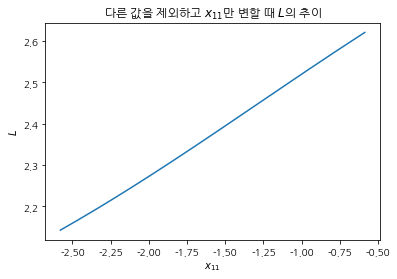

In [57]:
plt.plot(x11s, Ls);
#plt.title("다른 값을 제외하고 $x_{11}$만 변할 때 $L$의 추이")

plt.xlabel("$x_{11}$")
plt.ylabel("$L$");
# plt.savefig(IMG_FOLDER_PATH + "18_x11_vs_L.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "18_x11_vs_L.pdf");